In [3]:
import matplotlib.pyplot as plt            
from tabulate import tabulate                                   
import seaborn as sb                      
import pandas as pd                         
import numpy as np     
import math
from scipy.stats import f
import statistics as st

In [4]:
emp = pd.read_csv("data.csv") 

In [5]:
emp

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


## 1. Analysis of Business Travel on Attrition
One could consider analyzing all the above columns for the employees who are traveling rarely. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.

In [6]:
pd.crosstab(emp.Attrition,emp.BusinessTravel)

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,137,201,869
Yes,11,67,155


<AxesSubplot:xlabel='Attrition'>

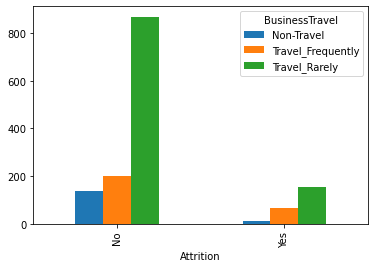

In [7]:
pd.crosstab(emp.Attrition,emp.BusinessTravel).plot.bar()

In [8]:
#From the cross table and graph we can say that the emp who are travelling rarely and are attrited 

In [9]:
emp1=emp[(emp.BusinessTravel=='Travel_Rarely')]
emp1['Department'].value_counts()

Research & Development    666
Sales                     310
Human Resources            45
Name: Department, dtype: int64

<AxesSubplot:>

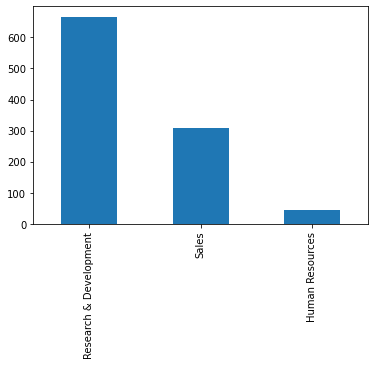

In [10]:
emp1['Department'].value_counts().plot.bar()

In [11]:
emp1['JobRole'].value_counts()

Sales Executive              223
Research Scientist           205
Laboratory Technician        178
Manufacturing Director       101
Healthcare Representative     85
Manager                       76
Research Director             59
Sales Representative          55
Human Resources               37
Name: JobRole, dtype: int64

<AxesSubplot:>

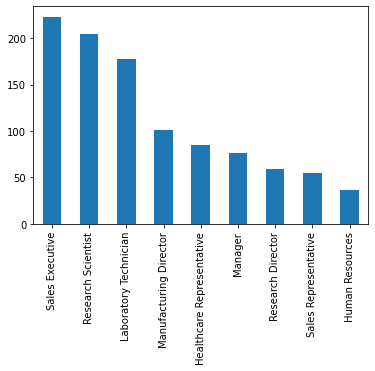

In [12]:
emp1['JobRole'].value_counts().plot.bar()

In [13]:
emp1['JobInvolvement'].value_counts()

3    603
2    264
4    105
1     52
Name: JobInvolvement, dtype: int64

<AxesSubplot:>

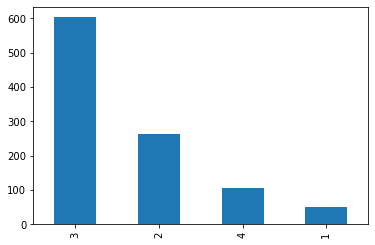

In [14]:
emp1['JobInvolvement'].value_counts().plot.bar()

## 2. Analysis of EducationField with Attrition
One could consider analyzing all the above columns for the employees who are from Medical and Life Science backgrounds.
However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns 
for further analysis.
Let's consider the following columns:
1. Monthly Income
2. Years in current role
3. Years at company

In [15]:
pd.crosstab(emp.Attrition,emp.EducationField)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,514,121,400,70,100
Yes,7,88,34,63,11,30


<AxesSubplot:xlabel='Attrition'>

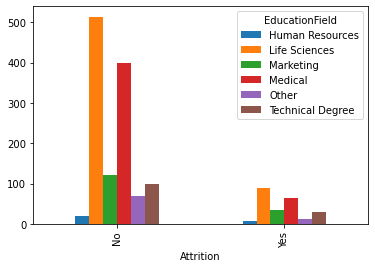

In [16]:
pd.crosstab(emp.Attrition,emp.EducationField).plot.bar()

In [17]:
#employees of life sciences and medical are most attrited

### Most emp who have attrited are from life sciences , medical and most Who havent attrited are also from life sciences and medical

In [18]:
emp1=emp[(emp.EducationField=='Life Sciences')| (emp.EducationField=='Medical')]

In [19]:
pd.crosstab(emp1.Department,emp1.Attrition)

Attrition,No,Yes
Department,,
Human Resources,26,3
Research & Development,691,105
Sales,193,43


<AxesSubplot:xlabel='Department'>

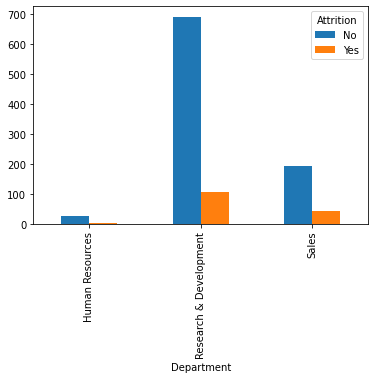

In [20]:
pd.crosstab(emp1.Department,emp1.Attrition).plot.bar()

In [21]:
#Research and development has got most attrited and HR department are least attrited

In [22]:
emp.groupby(['EducationField'])['HourlyRate'].mean()

EducationField
Human Resources     60.888889
Life Sciences       66.880399
Marketing           66.251613
Medical             65.257019
Other               62.629630
Technical Degree    66.692308
Name: HourlyRate, dtype: float64

<AxesSubplot:xlabel='EducationField', ylabel='HourlyRate'>

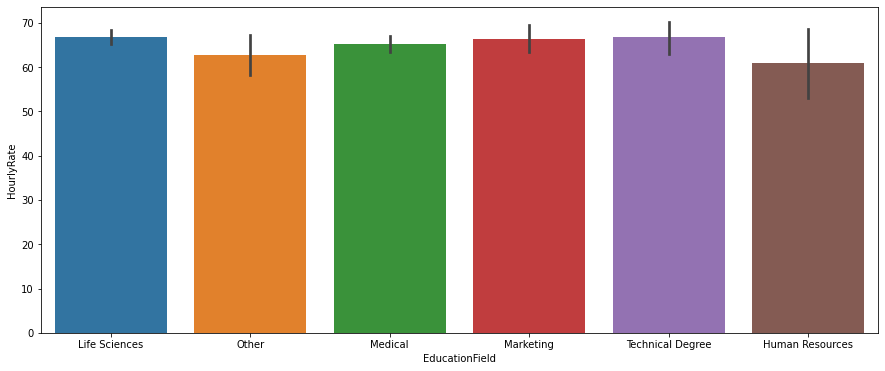

In [23]:
plt.figure(figsize=(15,6))
sb.barplot(data=emp,x='EducationField',y='HourlyRate',estimator=np.mean)

In [24]:
#from this graph we can see average hourly rate of all the different education field

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='EducationField'>

<Figure size 1080x720 with 0 Axes>

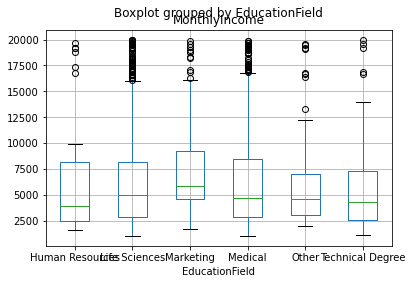

In [25]:
plt.figure(figsize=(15,10))
emp.boxplot(by='EducationField',column=['MonthlyIncome'])

## 3. Is there any relation between the Employee's Attrition and the Department?
One could consider analyzing all the above columns for the employees who from the sales department. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.
Let's consider the following columns:

1.Attrition
2.Gender
3.Hourly Rate

In [26]:
pd.crosstab(emp.Attrition,emp.Department)

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,824,354
Yes,12,133,92


<AxesSubplot:xlabel='Attrition'>

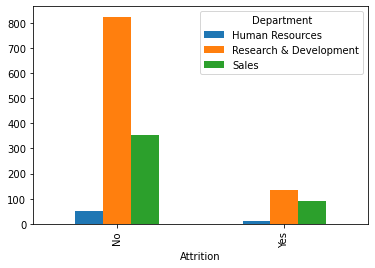

In [27]:
pd.crosstab(emp.Attrition,emp.Department).plot.bar()

In [28]:
#Most employees who are attrited are from reserch and devlopment and most employee not attrited are also from research and development

<AxesSubplot:xlabel='Gender', ylabel='count'>

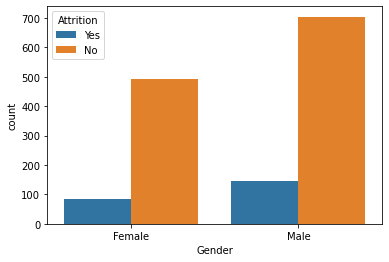

In [29]:
sb.countplot(x = 'Gender', hue="Attrition",data=emp)

In [30]:
pd.crosstab(emp.Gender,emp.Attrition)

Attrition,No,Yes
Gender,,
Female,491,85
Male,704,145


In [31]:
emp1=emp[(emp.Department=='Sales')]
emp1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
18,53.0,No,Travel_Rarely,Sales,2,Life Sciences,23,1,Female,78,...,No,3,3,31,3,3,25,8,3,7
21,36.0,Yes,Travel_Rarely,Sales,9,Life Sciences,27,3,Male,82,...,No,4,2,10,4,3,5,3,0,3
27,42.0,No,Travel_Rarely,Sales,8,Marketing,35,3,Male,48,...,No,3,4,10,2,3,9,7,4,2
29,46.0,No,Travel_Rarely,Sales,2,Marketing,38,2,Female,83,...,No,3,4,22,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,45.0,No,Travel_Rarely,Sales,20,Life Sciences,2046,4,Female,50,...,No,3,3,8,3,3,5,3,0,1
1461,50.0,Yes,Travel_Rarely,Sales,28,Marketing,2055,4,Male,39,...,Yes,3,2,20,3,3,3,2,2,0
1462,39.0,No,Travel_Rarely,Sales,24,NaN,2056,2,Female,60,...,No,3,1,21,2,2,20,9,9,6
1464,26.0,No,Travel_Rarely,Sales,5,Other,2060,4,Female,30,...,No,3,4,5,2,3,4,2,0,0


In [32]:
pd.crosstab(emp1.Gender,emp1.Attrition)

Attrition,No,Yes
Gender,,
Female,147,38
Male,197,53


<AxesSubplot:xlabel='Gender'>

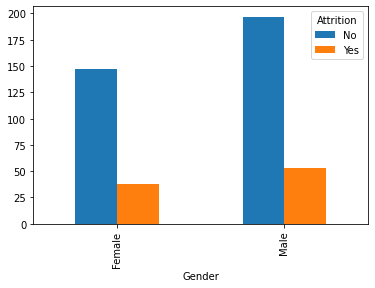

In [33]:
pd.crosstab(emp1.Gender,emp1.Attrition).plot.bar()

In [34]:
print('Persentage of female attrition :',(38/185)*100)
print('Persentage of male attrition :',(53/250)*100)

Persentage of female attrition : 20.54054054054054
Persentage of male attrition : 21.2


In [35]:
# we can say that males have bit of batte chance to get attrited in sales department compared  to males 

<AxesSubplot:ylabel='Attrition'>

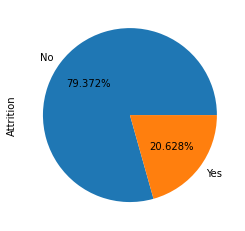

In [36]:
emp1['Attrition'].value_counts().plot(kind='pie',autopct='%.3f%%')

In [37]:
#20.6 % of employee is sales department have been attrited and 79% of employee  in sales havent been attrited 

## 4. Analysis of Environment Satisfaction with the Attrition


One could consider analyzing all the above columns for the employees who have lower environment satisfaction. However it could be a waste of time, hence it is better to consult the domain expert to choose the appropriate columns for further analysis.
Let's consider the following columns:

JobRole
Department
HourlyRate

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

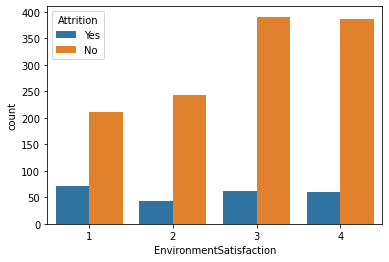

In [38]:
sb.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=emp)

In [39]:
emp1=emp[(emp.EnvironmentSatisfaction==1)|(emp.EnvironmentSatisfaction==2)]
emp1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
10,35.0,No,Travel_Rarely,Research & Development,16,Medical,14,1,Male,84,...,No,3,3,6,5,3,5,4,0,3
12,31.0,No,Travel_Rarely,Research & Development,26,Life Sciences,16,1,Male,31,...,No,3,4,5,1,2,5,2,4,3
13,34.0,No,Travel_Rarely,Research & Development,19,Medical,18,2,Male,93,...,No,3,3,3,2,3,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,36.0,No,Travel_Rarely,Sales,11,Marketing,2045,2,Female,100,...,No,3,1,8,2,2,6,3,0,0
1462,39.0,No,Travel_Rarely,Sales,24,NaN,2056,2,Female,60,...,No,3,1,21,2,2,20,9,9,6
1463,31.0,No,Non-Travel,Research & Development,5,Medical,2057,2,Male,74,...,No,3,2,10,2,3,9,4,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3


<AxesSubplot:>

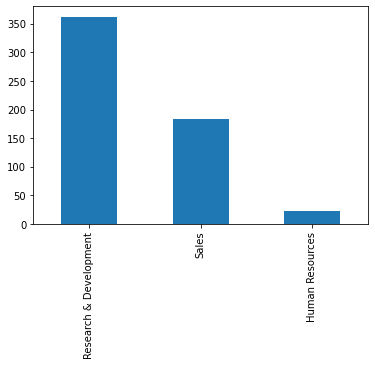

In [40]:
emp1['Department'].value_counts().plot.bar()

In [41]:
#empioyeez who have low envirment satisfaction most of them are in reaserch and development department

<AxesSubplot:>

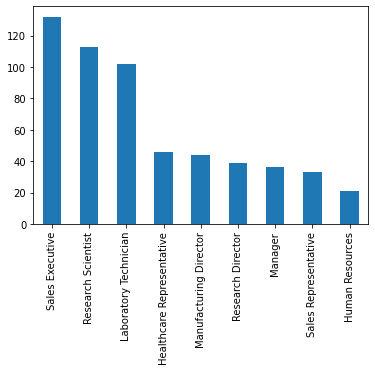

In [42]:
emp1['JobRole'].value_counts().plot.bar()

In [43]:
# employee who have low envirment satisfaction most of these are in role of sales executive 

<AxesSubplot:xlabel='HourlyRate', ylabel='Count'>

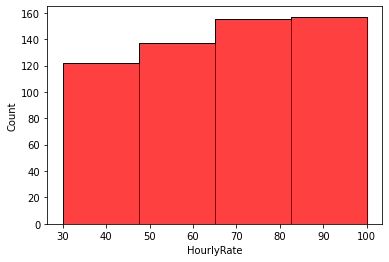

In [47]:
sb.histplot(emp1['HourlyRate'],bins=4,color='Red')

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='HourlyRate'>

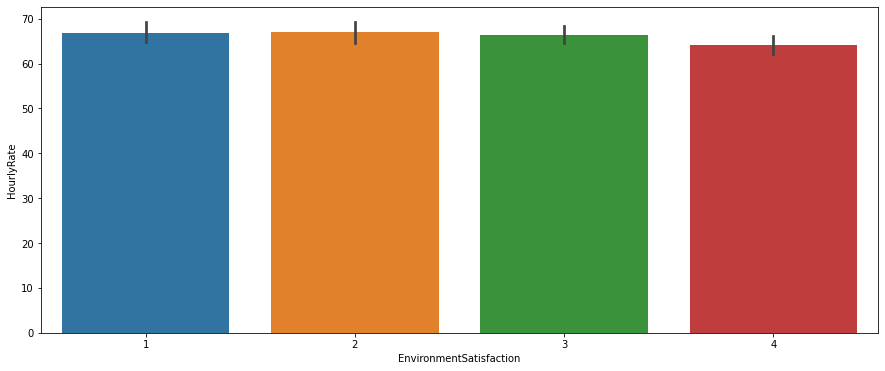

In [48]:
plt.figure(figsize=(15,6))
sb.barplot(data=emp,x='EnvironmentSatisfaction',y='HourlyRate',estimator=np.mean)

In [49]:
emp.groupby(['EnvironmentSatisfaction'])['HourlyRate'].mean()

EnvironmentSatisfaction
1    66.838028
2    66.940767
3    66.373068
4    64.123318
Name: HourlyRate, dtype: float64

In [50]:
#avg hourly rate is similor for every either low eniverment satisfaction or high eniverment satifaction 

In [51]:
# Most employees with low envirment satisfaction have hourly rate less than 80

## 5. Gender analysis on Attrition of the employees who left the firm and those who are still with it

<AxesSubplot:xlabel='Gender', ylabel='count'>

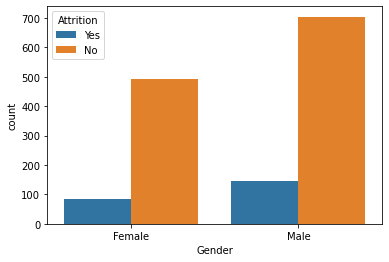

In [52]:
sb.countplot(x='Gender',hue='Attrition',data=emp)

In [53]:
emp.groupby(['Attrition'])['Gender'].value_counts()

Attrition  Gender
No         Male      704
           Female    491
Yes        Male      145
           Female     85
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

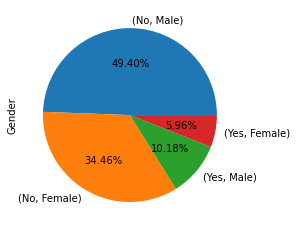

In [54]:
emp.groupby(['Attrition'])['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [55]:
#49% of total employee are male and not s , 35% of female are not attrited and are females
#10.18% of total employee are male and attrited for attrition males have higher chances than female

<AxesSubplot:xlabel='Age', ylabel='Count'>

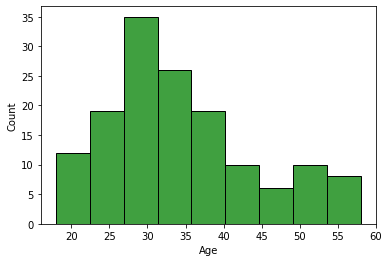

In [56]:
emp1=emp[(emp.Gender=='Male') & (emp.Attrition=='Yes')]
sb.histplot(emp1['Age'],color='Green')

In [57]:
# most male employee who are attired have age between 25-35

<AxesSubplot:xlabel='Department', ylabel='count'>

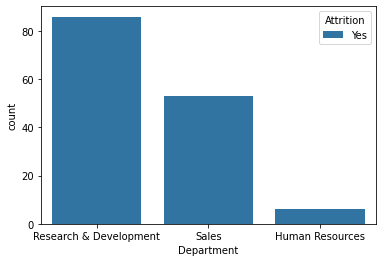

In [58]:
sb.countplot(x="Department",hue='Attrition',data=emp1)

In [59]:
# Most of employee who have attired are in research and sales department , least of them are in the human resourse department

In [60]:
emp1=emp[(emp.Gender=='Male')]

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

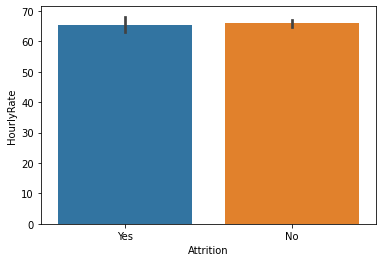

In [62]:
sb.barplot(data= emp,x='Attrition',y='HourlyRate',estimator=np.mean)
#not only for male 

## 6.Marital Status analysis of the employees who have left and who are still with the firm

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

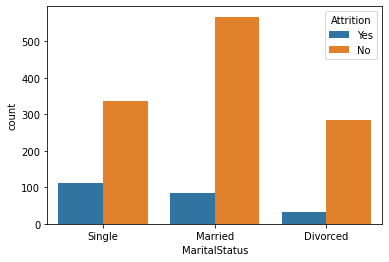

In [63]:
sb.countplot(x='MaritalStatus',hue='Attrition',data=emp)

In [64]:
# Most employee of attrited are married

In [66]:
emp1=emp[(emp.MaritalStatus=='Single')&(emp.Attrition=='Yes')]
emp1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
14,28.0,Yes,Travel_Rarely,Research & Development,24,Life Sciences,19,3,Male,50,...,Yes,3,2,6,4,3,4,2,0,3
21,36.0,Yes,Travel_Rarely,Sales,9,Life Sciences,27,3,Male,82,...,No,4,2,10,4,3,5,3,0,3
24,34.0,Yes,Travel_Rarely,Research & Development,6,Medical,31,2,Male,83,...,No,3,3,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,56.0,Yes,Travel_Rarely,Research & Development,24,Life Sciences,1907,1,Male,97,...,No,3,4,5,3,3,4,2,1,0
1365,29.0,Yes,Travel_Frequently,Sales,24,Technical Degree,1928,3,Male,45,...,No,3,4,1,3,3,1,0,0,0
1369,28.0,Yes,Travel_Rarely,Sales,13,Marketing,1933,4,Female,84,...,Yes,3,4,6,0,3,2,0,2,2
1375,32.0,Yes,Travel_Frequently,Research & Development,5,Life Sciences,1939,1,Female,47,...,Yes,3,1,8,2,3,4,1,0,3


<AxesSubplot:xlabel='Age', ylabel='Count'>

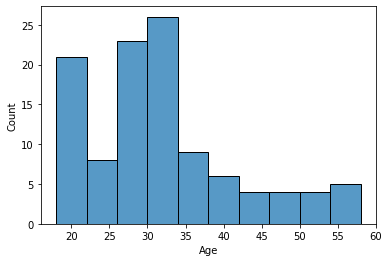

In [67]:
sb.histplot(emp1['Age'])

In [68]:
#most of employee who are single and attrited are age group of 25-35

In [69]:
emp2=emp[(emp.MaritalStatus=='Single')]

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

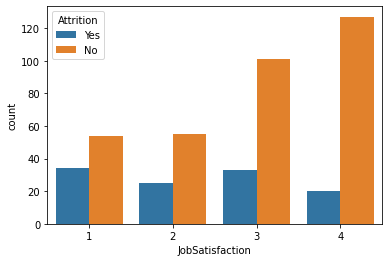

In [70]:
sb.countplot(x='JobSatisfaction',hue='Attrition',data=emp2)

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='MaritalStatus'>

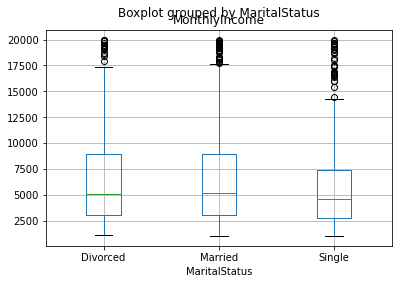

In [71]:
emp.boxplot(by='MaritalStatus',column=['MonthlyIncome'])

In [72]:
# who are attrited and single have low job satisfaction & who are married and divorced have a better spread of salary

## 7.Effect of the Performance Rating with the Attrition

In [73]:
emp

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

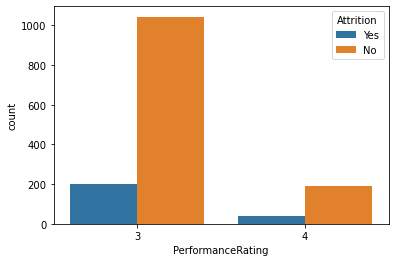

In [74]:
sb.countplot(x='PerformanceRating',hue='Attrition',data=emp)

<AxesSubplot:xlabel='Age', ylabel='Count'>

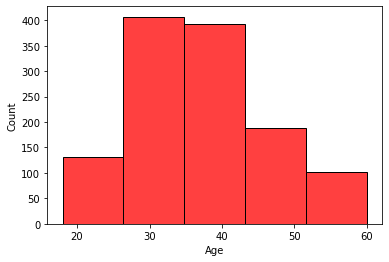

In [76]:
emp1=emp[(emp.PerformanceRating==3)]
sb.histplot(emp1['Age'],bins=5,color='Red')

In [77]:
#Emmployees with lowest PerformanceRatingnmost are most are age group is 25-45

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

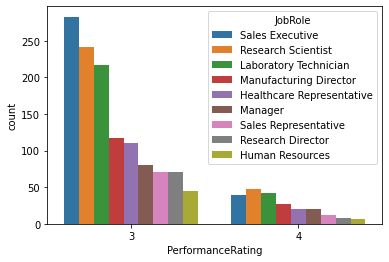

In [78]:
sb.countplot(x='PerformanceRating',hue='JobRole',data=emp)

In [79]:
#employee having low perfomance rating in the departmenet sales excicutive and research scientist

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

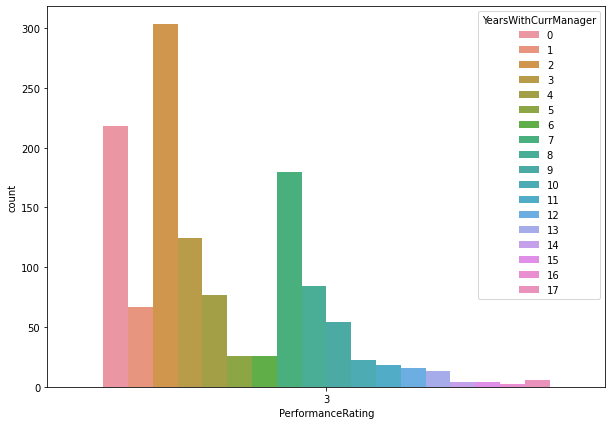

In [80]:
fig, ax = plt.subplots(figsize=(10,7))
sb.countplot(x='PerformanceRating',hue='YearsWithCurrManager',data=emp1)

In [81]:
#employee with low performance rating most are the less than 5 years with current manager

## 8. Job Satisfaction analysis of the employees who have left and who are still with the firm

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

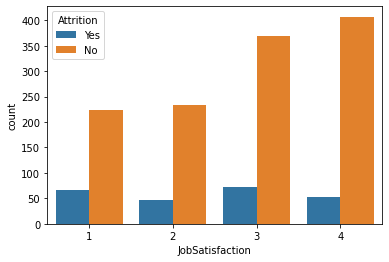

In [82]:
sb.countplot(x='JobSatisfaction',hue='Attrition',data=emp)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

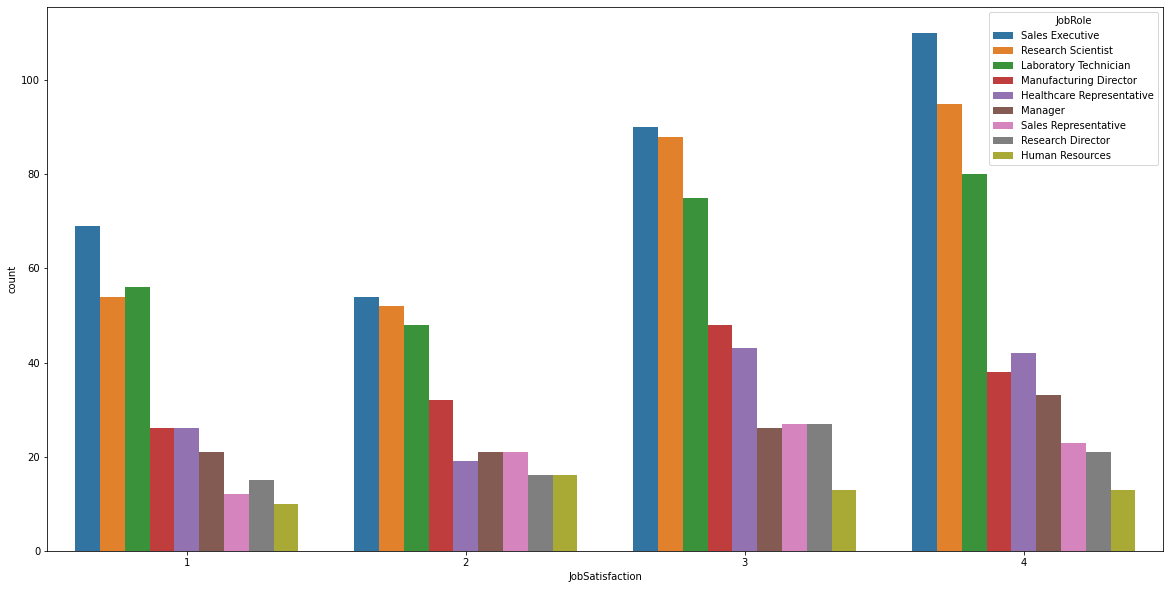

In [83]:
fig, ax = plt.subplots(figsize=(20,10))
sb.countplot(x='JobSatisfaction',hue='JobRole',data=emp)

In [84]:
#employee with lower performance rating have jobrole of sales excutive and research scientist

In [85]:
emp1=emp[(emp.JobSatisfaction<3)]
emp1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
6,59.0,No,Travel_Rarely,Research & Development,3,Medical,10,3,Female,81,...,Yes,4,1,12,3,2,1,0,0,0
10,35.0,No,Travel_Rarely,Research & Development,16,Medical,14,1,Male,84,...,No,3,3,6,5,3,5,4,0,3
15,29.0,No,Travel_Rarely,Research & Development,21,Life Sciences,20,2,Female,51,...,No,3,3,10,1,3,10,9,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,50.0,Yes,Travel_Rarely,Sales,28,Marketing,2055,4,Male,39,...,Yes,3,2,20,3,3,3,2,2,0
1463,31.0,No,Non-Travel,Research & Development,5,Medical,2057,2,Male,74,...,No,3,2,10,2,3,9,4,1,7
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3


<AxesSubplot:xlabel='Department', ylabel='count'>

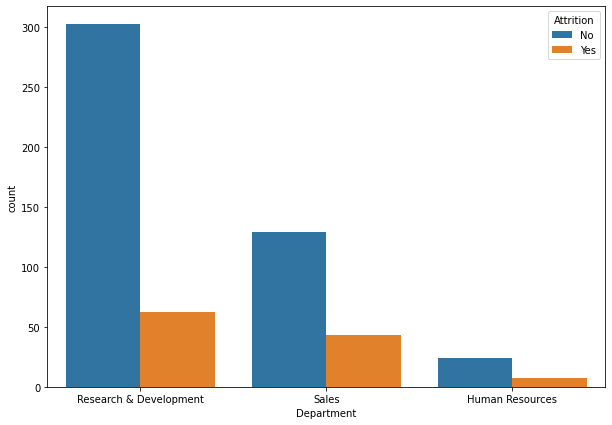

In [89]:
fig, ax = plt.subplots(figsize=(10,7))
sb.countplot(x='Department',hue='Attrition',data=emp1)

In [90]:
#employee who have low performance ratings most of the attrited employees are in the reserch and development department 
#and employee not atrited most are in resarch and development

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

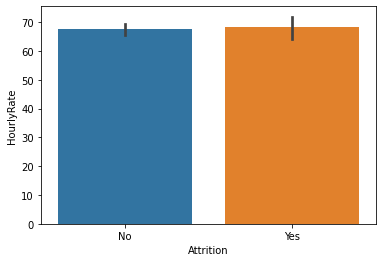

In [92]:
sb.barplot(data=emp1,x='Attrition',y='HourlyRate',estimator=np.mean)

In [93]:
#avg hourly rate and attrition doesnt matter for lower performance rated employees

## 9. Employee's Age analysis with their customers who have left and who are still with the firm

<AxesSubplot:title={'center':'Age'}, xlabel='Attrition'>

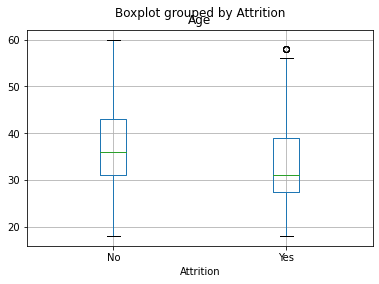

In [94]:
emp.boxplot(by='Attrition',column=['Age'])

<AxesSubplot:ylabel='JobRole'>

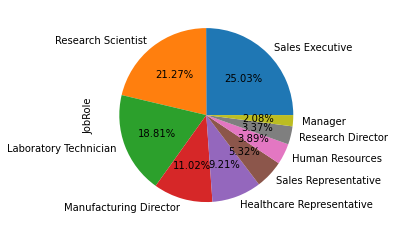

In [96]:
emp1=emp[(emp.Age>=28)&(emp.Age<=40)]
emp1['JobRole'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [97]:
#in the age group of 28-40 most employee are from job role sales executive and reserch scientist 
#least employee of this age group are in the job role manager and reserch director

<AxesSubplot:>

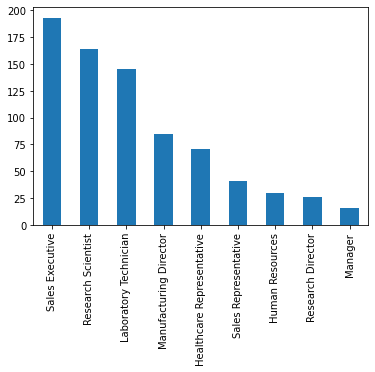

In [98]:
emp1['JobRole'].value_counts().plot.bar()

In [99]:
#In the age group of 28 to 40 most of the employees are in the department sales executive and research scientist

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='Attrition'>

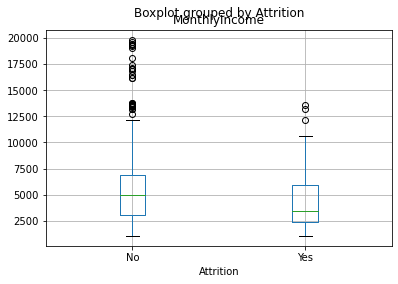

In [100]:
emp1.boxplot(by='Attrition',column=['MonthlyIncome'])

In [101]:
# Age group of 28-40 those who are not attrited have a batter salary spread than those who are attrited

## 10. Is there any relation between the hourly rate of the employees with the employees who have left?

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

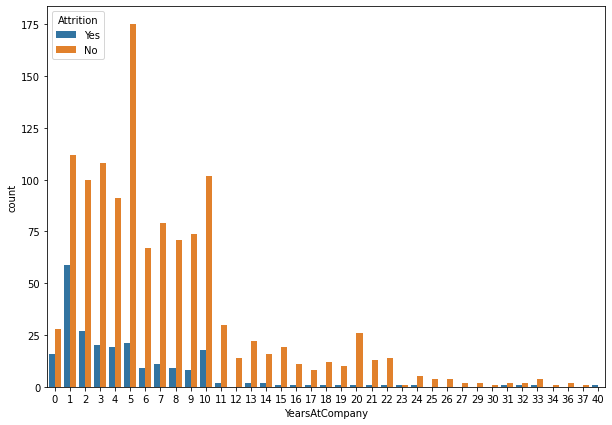

In [103]:
fig, ax = plt.subplots(figsize=(10,7))
sb.countplot(x='YearsAtCompany',hue='Attrition',data=emp)

In [104]:
#Most employee who are attrited have spent 0-10 year at the company 

<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

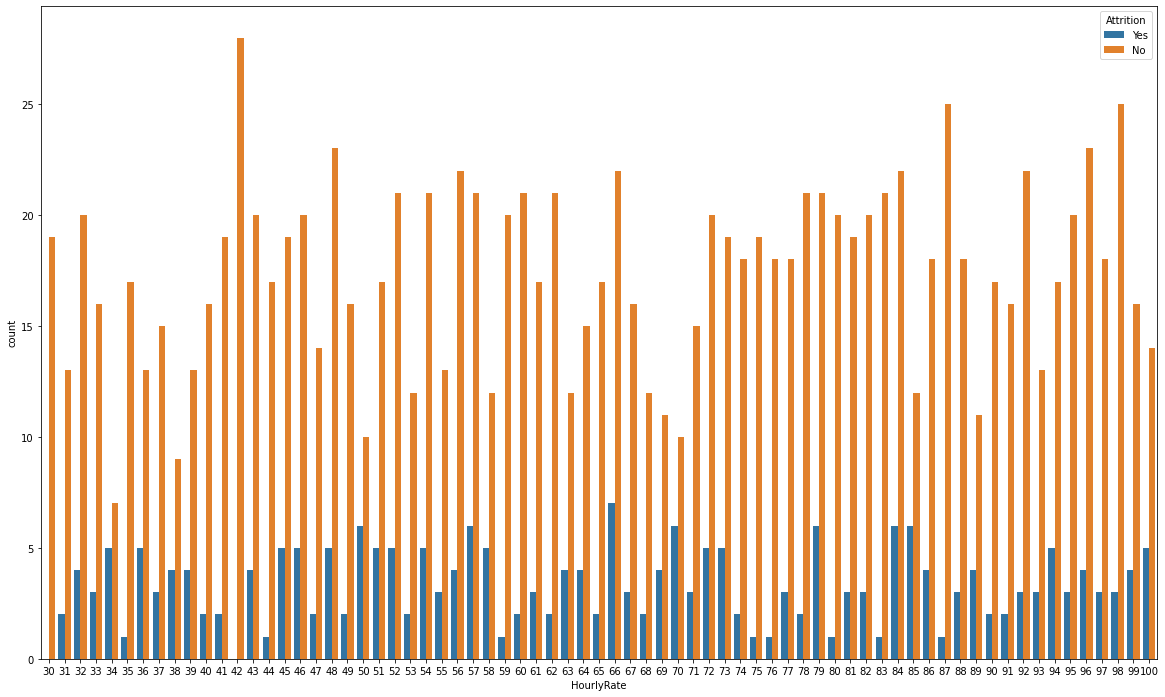

In [105]:
fig, ax = plt.subplots(figsize=(20,12))
sb.countplot(x='HourlyRate',hue='Attrition',data=emp)

## 11. Monthly Income analysis of the employees who have left and who are still with the firm.

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='Attrition'>

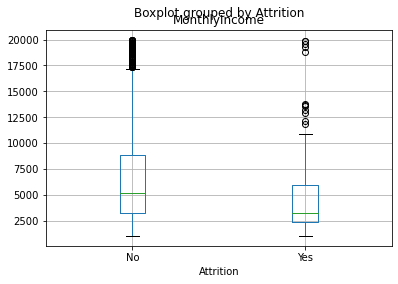

In [106]:
emp.boxplot(by='Attrition',column=['MonthlyIncome'])

<AxesSubplot:ylabel='JobRole'>

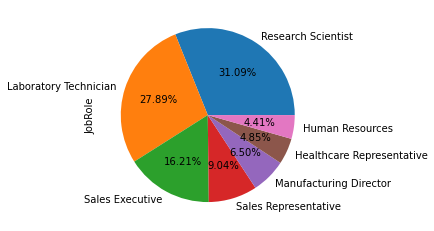

In [107]:
emp1=emp[(emp.MonthlyIncome<6000)]
emp1['JobRole'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [108]:
# Those who have monthly income less than 6000 most are in the jobroles research scientist  and  laborotory technicion

<AxesSubplot:>

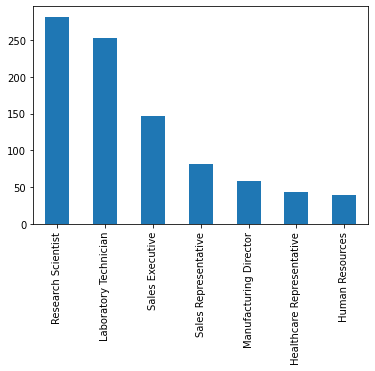

In [109]:
emp1['JobRole'].value_counts().plot.bar()

In [110]:
#employee with monthly income less than 6000 most are in the jobroles research scientist  and  laborotory technicion

In [111]:
emp1=emp[(emp.TotalWorkingYears<20)]

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='TotalWorkingYears'>

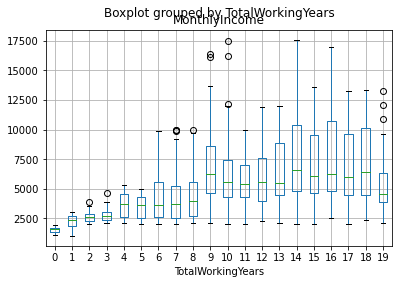

In [112]:
emp1.boxplot(by='TotalWorkingYears',column=['MonthlyIncome'])

In [113]:
#less total working years have less spread of salary , i.e employee with less working years are likely to 
#get less salary resulting in them not being attrited

In [114]:
emp2=emp[(emp.Attrition=='Yes')]
emp3=emp[(emp.Attrition=='No')]

<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

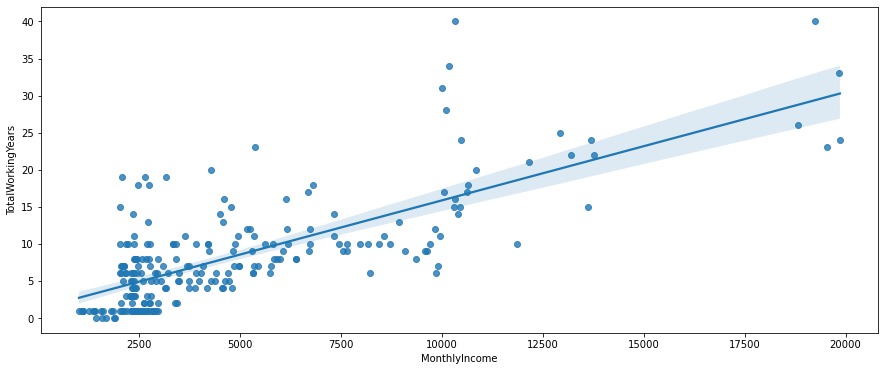

In [115]:
plt.figure(figsize=(15,6))
sb.regplot(x='MonthlyIncome',y='TotalWorkingYears',data=emp2)

In [116]:
emp2['MonthlyIncome'].corr(emp2['TotalWorkingYears'])

0.7422769898762983

<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

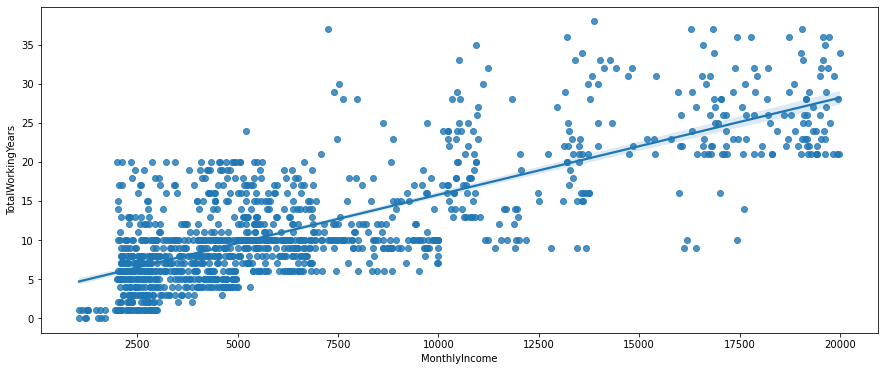

In [117]:
plt.figure(figsize=(15,6))
sb.regplot(x='MonthlyIncome',y='TotalWorkingYears',data=emp3)

In [118]:
emp3['MonthlyIncome'].corr(emp3['TotalWorkingYears'])

0.7716382910867136

In [119]:
#monthly income for employees who are attrited and who arent attrited are strong positively correlated with totalworkyears
#as monthly income increase total working years increases

## 12. How distance from home is impacting the attrition of employees?

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

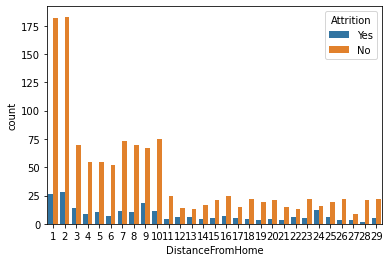

In [120]:
 sb.countplot(x='DistanceFromHome',hue='Attrition',data=emp)

In [121]:
# most of employee who arent attrited have distance from home 1-10km

In [122]:
emp1=emp[(emp.DistanceFromHome>=7)]
emp2=emp[(emp.DistanceFromHome<7)]

In [123]:
emp1['JobRole'].value_counts()

Sales Executive              185
Research Scientist           144
Laboratory Technician        141
Manufacturing Director        77
Healthcare Representative     75
Sales Representative          45
Research Director             42
Manager                       41
Human Resources               24
Name: JobRole, dtype: int64

<AxesSubplot:>

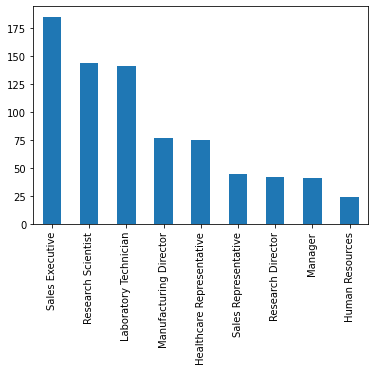

In [124]:
emp1['JobRole'].value_counts().plot.bar()

<AxesSubplot:ylabel='JobRole'>

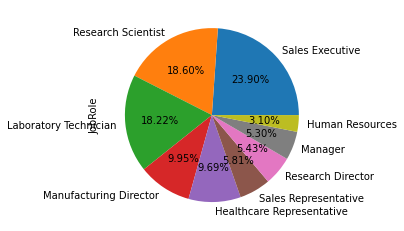

In [125]:
emp1['JobRole'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [126]:
#Employee have distance from home >=7km are in the jobroles sales executive and reserach scientist

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='Attrition'>

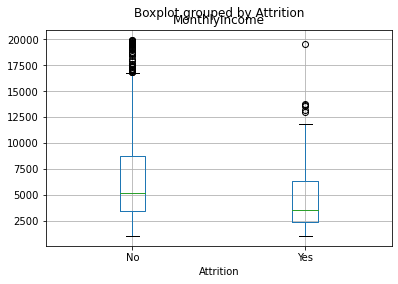

In [127]:
emp1.boxplot(by='Attrition',column=['MonthlyIncome'])

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='Attrition'>

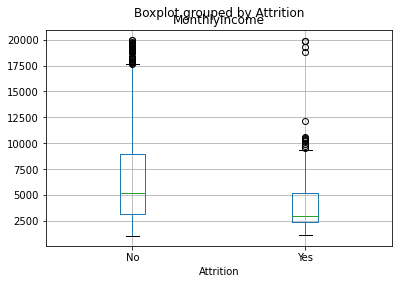

In [128]:
emp2.boxplot(by='Attrition',column=['MonthlyIncome'])

In [129]:
# those who have distance from home >7km  have batter salary spread from non attrited employees

In [130]:
emp2['JobInvolvement'].value_counts()

3    393
2    194
4     64
1     40
Name: JobInvolvement, dtype: int64

<AxesSubplot:ylabel='JobInvolvement'>

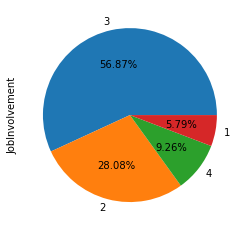

In [132]:
emp2['JobInvolvement'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [133]:
# Job involvement for employee who are distance from home 7>km most of good involvement very few have the lowest involment role

In [ ]:
`